In [1]:
#Import libraries
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import norm
from scipy import stats
import scipy as sp
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.power import TTestIndPower, TTestPower
warnings.filterwarnings("ignore")
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 300)

In [2]:
#read in data
df = pd.read_csv('listingscleanFINAL.csv', index_col=0)

## Data Cleanings


In [3]:
df.shape

(8026, 20)

In [4]:
df.dtypes

host_response_rate            object
host_is_superhost              int64
host_total_listings_count    float64
neighbourhood_cleansed        object
latitude                     float64
longitude                    float64
property_type                 object
room_type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
price                         object
guests_included                int64
extra_people                  object
minimum_nights                 int64
maximum_nights                 int64
number_of_reviews              int64
review_scores_rating         float64
instant_bookable               int64
dtype: object

In [5]:
df['extra_people']=df['extra_people'].astype(str).apply(lambda x:x.strip('$'))
df['extra_people']=df['extra_people'].apply(lambda x:x.replace(",",''))
df['extra_people']

id
958         25.00 
3850        20.00 
5858         0.00 
7918        12.00 
8142        12.00 
             ...  
39337552     0.00 
39342094    50.00 
39343373     0.00 
39344101     0.00 
39350028     0.00 
Name: extra_people, Length: 8026, dtype: object

In [6]:
df['extra_people']=df['extra_people'].astype(float)
df['extra_people']

id
958         25.0
3850        20.0
5858         0.0
7918        12.0
8142        12.0
            ... 
39337552     0.0
39342094    50.0
39343373     0.0
39344101     0.0
39350028     0.0
Name: extra_people, Length: 8026, dtype: float64

In [7]:
df['price']=df['price'].astype(str).apply(lambda x:x.strip('$'))
df['price']=df['price'].apply(lambda x:x.replace(",",''))
df['price']


id
958         170.00 
3850         99.00 
5858        235.00 
7918         65.00 
8142         65.00 
             ...   
39337552    113.00 
39342094    699.00 
39343373    200.00 
39344101     69.00 
39350028    187.00 
Name: price, Length: 8026, dtype: object

In [8]:
df.dropna(subset=['host_response_rate'], inplace=True)
df.reset_index(drop=True, inplace=True)
df['host_response_rate'] = df['host_response_rate'].map(lambda x: x.replace('%', ''))
df['host_response_rate'] = df['host_response_rate'].astype('int')


In [9]:
df['price']=df['price'].astype(float)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x103cca310>]],
      dtype=object)

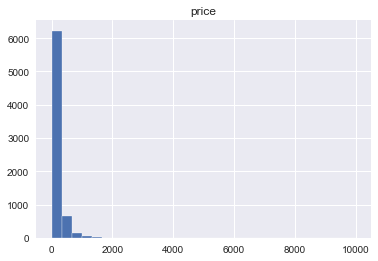

In [10]:
#price looks skewed
df.hist(column=['price'], bins=30)

In [11]:
df.describe()

,host_response_rate,host_is_superhost,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable
count,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000
mean,96.519961,0.475401,99.734608,37.766316,-122.429978,3.111189,1.401321,1.315997,1.713241,219.825274,1.710571,16.546247,15.081389,523.800253,48.337363,95.179835,0.424374
std,11.393944,0.499430,339.039092,0.022781,0.027001,1.871864,0.958196,0.908250,1.142277,407.912788,1.309272,29.826753,18.586429,1293.612702,81.228720,6.980145,0.494282
min,0.000000,0.000000,0.000000,37.708160,-122.513060,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,20.000000,0.000000
25%,100.000000,0.000000,1.000000,37.751562,-122.442892,2.000000,1.000000,1.000000,1.000000,99.000000,1.000000,0.000000,2.000000,29.000000,1.000000,94.621554,0.000000
50%,100.000000,0.000000,3.000000,37.769690,-122.424270,2.000000,1.000000,1.000000,1.000000,150.000000,1.000000,0.000000,4.000000,180.000000,12.000000,97.000000,0.000000
75%,100.000000,1.000000,16.000000,37.785910,-122.410530,4.000000,1.500000,2.000000,2.000000,232.000000,2.000000,25.000000,30.000000,1125.000000,60.000000,99.000000,1.000000
max,100.000000,1.000000,1735.000000,37.810310,-122.370430,16.000000,14.000000,14.000000,14.000000,10000.000000,16.000000,300.000000,365.000000,100000.000000,757.000000,100.000000,1.000000


In [12]:
df.price.quantile(.99)

1200.0

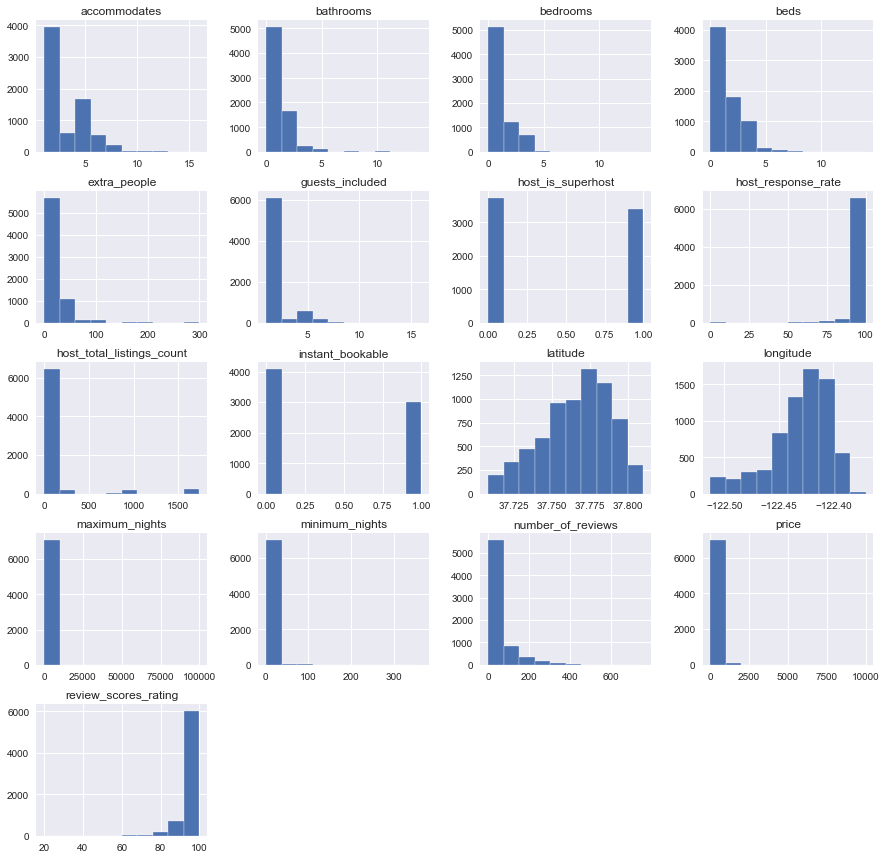

In [13]:
#histograms of the data
df.hist(figsize  = [15, 15]); 

In [14]:
#the data looks somewhat tailed, will probably clean the outliers of the data
df.describe()

,host_response_rate,host_is_superhost,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable
count,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000
mean,96.519961,0.475401,99.734608,37.766316,-122.429978,3.111189,1.401321,1.315997,1.713241,219.825274,1.710571,16.546247,15.081389,523.800253,48.337363,95.179835,0.424374
std,11.393944,0.499430,339.039092,0.022781,0.027001,1.871864,0.958196,0.908250,1.142277,407.912788,1.309272,29.826753,18.586429,1293.612702,81.228720,6.980145,0.494282
min,0.000000,0.000000,0.000000,37.708160,-122.513060,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,20.000000,0.000000
25%,100.000000,0.000000,1.000000,37.751562,-122.442892,2.000000,1.000000,1.000000,1.000000,99.000000,1.000000,0.000000,2.000000,29.000000,1.000000,94.621554,0.000000
50%,100.000000,0.000000,3.000000,37.769690,-122.424270,2.000000,1.000000,1.000000,1.000000,150.000000,1.000000,0.000000,4.000000,180.000000,12.000000,97.000000,0.000000
75%,100.000000,1.000000,16.000000,37.785910,-122.410530,4.000000,1.500000,2.000000,2.000000,232.000000,2.000000,25.000000,30.000000,1125.000000,60.000000,99.000000,1.000000
max,100.000000,1.000000,1735.000000,37.810310,-122.370430,16.000000,14.000000,14.000000,14.000000,10000.000000,16.000000,300.000000,365.000000,100000.000000,757.000000,100.000000,1.000000


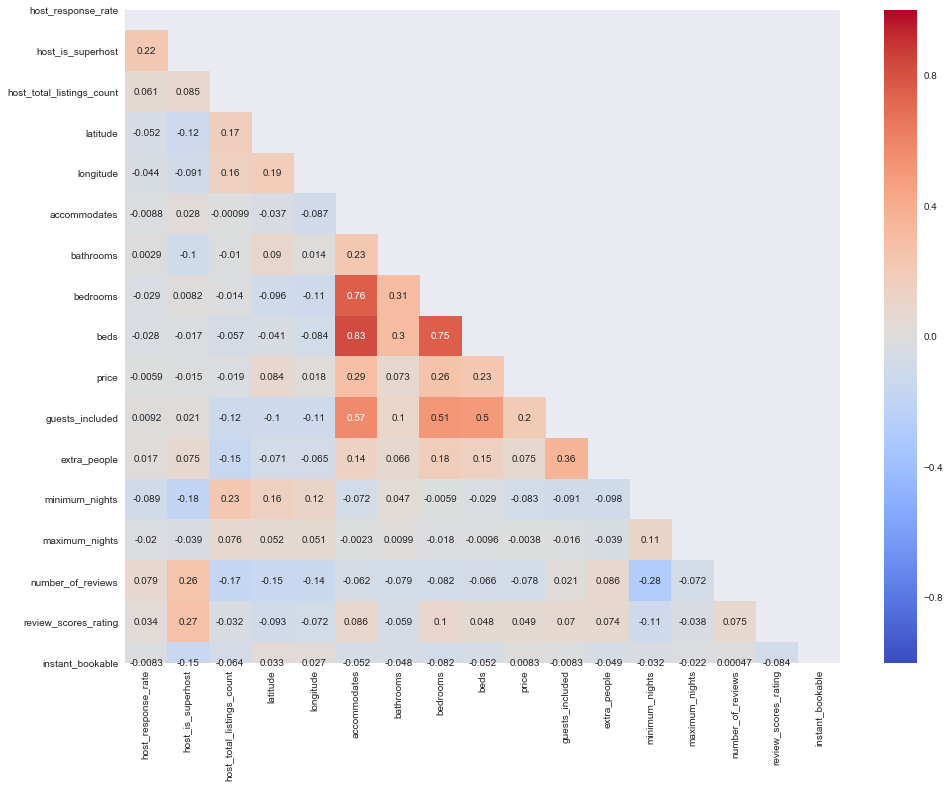

In [15]:
#creating a heatmap

f, ax = plt.subplots(figsize=(16, 12))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)




In [16]:
df['maximum_nights'].corr(df['minimum_nights'])

0.11495261870893207

Max and minimum nights have a correlaton of one so we decided to drop maximum nights. Otherswise there is little collinearity in the data outside of bedrooms/bathrooms whcih
we think is important enought to keep

In [17]:
df.drop(['maximum_nights'],axis = 1, inplace = True)

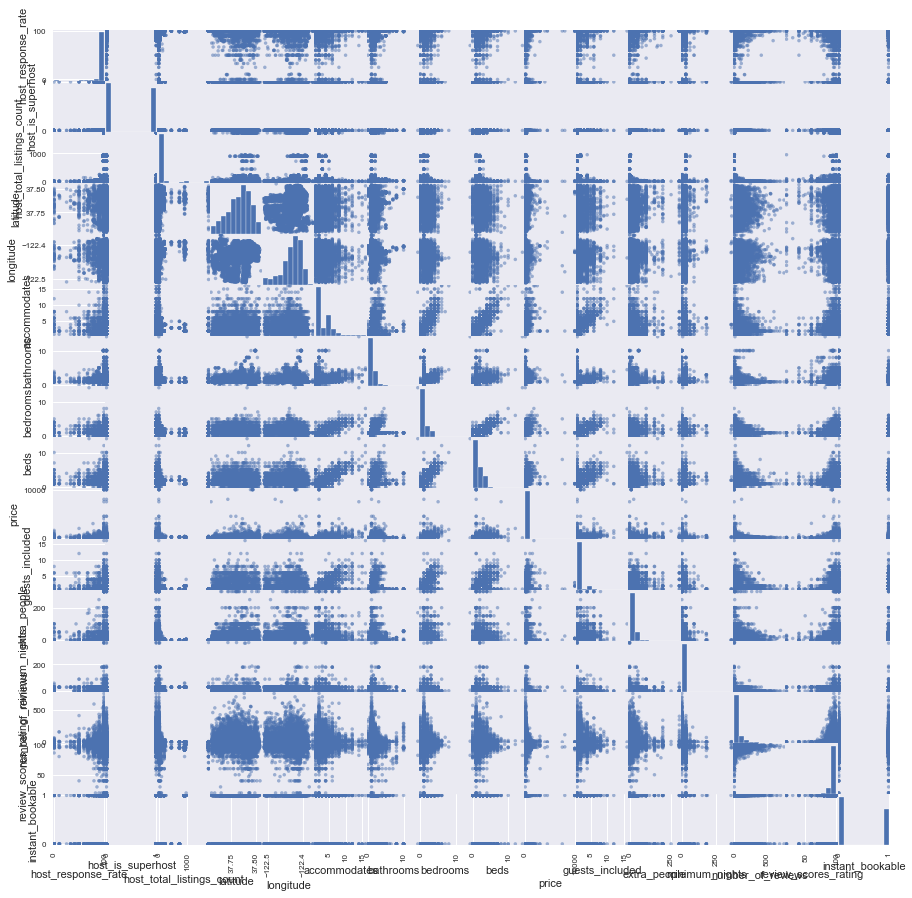

In [18]:
#looking at scatter plots of the dta
pd.plotting.scatter_matrix(df,figsize  = [15, 15]);
plt.show()

## Testing if mean price is higher for super host vs regular host
H_0: The means are the same H_A they're different
We'll use an alpha of .05

In [19]:
means = df.groupby('host_is_superhost')['price'].mean()
sigmas = df.groupby('host_is_superhost')['price'].std()
lengths = df.groupby('host_is_superhost')['price'].count()
print(means)
print(sigmas)
print(lengths)

host_is_superhost
0    225.627814
1    213.422235
Name: price, dtype: float64
host_is_superhost
0    515.279593
1    238.710647
Name: price, dtype: float64
host_is_superhost
0    3732
1    3382
Name: price, dtype: int64


In [20]:
#calculate effect size (cohen's d)
cohensd = (means[0]-means[1])/np.sqrt(((lengths[0]-1)*sigmas[0]+(lengths[1]-1)*sigmas[1])/(lengths[0]+lengths[1]-2))
cohensd

0.6230251967110617

In [21]:
# Calculate power
power_analysis = TTestIndPower()
power_analysis.solve_power(effect_size=cohensd, nobs1=lengths[0], alpha=.05)

1.0

This shows a mild effect size based on a cohen's d of .623

In [22]:
score = (means[0]-means[1])/(sigmas[0]/np.sqrt(lengths[0])+sigmas[1]/np.sqrt(lengths[1]))
score

0.9733717998668792

In [23]:
stats.norm.cdf(score)

0.8348157253738047

We accept the null that they are the same

## Testing if mean price is higher for instant booking
H_0: The means are the same H_A they're different
We'll use an alpha of .05

In [24]:
means = df.groupby('instant_bookable')['price'].mean()
sigmas = df.groupby('instant_bookable')['price'].std()
lengths = df.groupby('instant_bookable')['price'].count()
print(means)
print(sigmas)
print(lengths)

instant_bookable
0    216.934066
1    223.746936
Name: price, dtype: float64
instant_bookable
0    249.501192
1    554.700581
Name: price, dtype: float64
instant_bookable
0    4095
1    3019
Name: price, dtype: int64


In [25]:
#calculate effect size (cohen's d)
cohensd = (means[0]-means[1])/np.sqrt(((lengths[0]-1)*sigmas[0]+(lengths[1]-1)*sigmas[1])/(lengths[0]+lengths[1]-2))
cohensd

-0.34994738565193667

We see a very low cohen's d as the means of the samples look essentially the same

In [26]:
score = (means[0]-means[1])/(sigmas[0]/np.sqrt(lengths[0])+sigmas[1]/np.sqrt(lengths[1]))
score


-0.4868278178919345

In [27]:
stats.norm.cdf(score)

0.3131901775351004

In [28]:
# Calculate power
power_analysis = TTestIndPower()
power_analysis.solve_power(effect_size=cohensd, nobs1=lengths[0], alpha=.05)

1.0

We fail to reject the null that they are the same. In fact looking at the data
makes it clear that they seem pretty similar.

In [29]:
df.head()

,host_response_rate,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable
0,100,1,1.0,Western Addition,37.76931,-122.43386,Apartment,Entire home/apt,3,1.0,1.0,2.0,170.0,2,25.0,1,217,97.0,0
1,100,1,2.0,Inner Sunset,37.75402,-122.45805,House,Private room,2,1.0,1.0,1.0,99.0,2,20.0,1,160,94.0,0
2,80,0,2.0,Bernal Heights,37.74511,-122.42102,Apartment,Entire home/apt,5,1.0,2.0,3.0,235.0,2,0.0,30,111,98.0,0
3,86,1,10.0,Haight Ashbury,37.76669,-122.45250,Apartment,Private room,2,4.0,1.0,1.0,65.0,1,12.0,32,18,86.0,0
4,86,1,10.0,Haight Ashbury,37.76487,-122.45183,Apartment,Private room,2,4.0,1.0,1.0,65.0,1,12.0,32,8,93.0,0


In [30]:
df.describe()

,host_response_rate,host_is_superhost,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable
count,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000
mean,96.519961,0.475401,99.734608,37.766316,-122.429978,3.111189,1.401321,1.315997,1.713241,219.825274,1.710571,16.546247,15.081389,48.337363,95.179835,0.424374
std,11.393944,0.499430,339.039092,0.022781,0.027001,1.871864,0.958196,0.908250,1.142277,407.912788,1.309272,29.826753,18.586429,81.228720,6.980145,0.494282
min,0.000000,0.000000,0.000000,37.708160,-122.513060,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,20.000000,0.000000
25%,100.000000,0.000000,1.000000,37.751562,-122.442892,2.000000,1.000000,1.000000,1.000000,99.000000,1.000000,0.000000,2.000000,1.000000,94.621554,0.000000
50%,100.000000,0.000000,3.000000,37.769690,-122.424270,2.000000,1.000000,1.000000,1.000000,150.000000,1.000000,0.000000,4.000000,12.000000,97.000000,0.000000
75%,100.000000,1.000000,16.000000,37.785910,-122.410530,4.000000,1.500000,2.000000,2.000000,232.000000,2.000000,25.000000,30.000000,60.000000,99.000000,1.000000
max,100.000000,1.000000,1735.000000,37.810310,-122.370430,16.000000,14.000000,14.000000,14.000000,10000.000000,16.000000,300.000000,365.000000,757.000000,100.000000,1.000000


The minimum nights max looks very strange at 10 million so were going to drop that data point


In [31]:
df = df[df['minimum_nights']<366]

## Final data set

In [32]:
df.describe()

,host_response_rate,host_is_superhost,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable
count,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000
mean,96.519961,0.475401,99.734608,37.766316,-122.429978,3.111189,1.401321,1.315997,1.713241,219.825274,1.710571,16.546247,15.081389,48.337363,95.179835,0.424374
std,11.393944,0.499430,339.039092,0.022781,0.027001,1.871864,0.958196,0.908250,1.142277,407.912788,1.309272,29.826753,18.586429,81.228720,6.980145,0.494282
min,0.000000,0.000000,0.000000,37.708160,-122.513060,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,20.000000,0.000000
25%,100.000000,0.000000,1.000000,37.751562,-122.442892,2.000000,1.000000,1.000000,1.000000,99.000000,1.000000,0.000000,2.000000,1.000000,94.621554,0.000000
50%,100.000000,0.000000,3.000000,37.769690,-122.424270,2.000000,1.000000,1.000000,1.000000,150.000000,1.000000,0.000000,4.000000,12.000000,97.000000,0.000000
75%,100.000000,1.000000,16.000000,37.785910,-122.410530,4.000000,1.500000,2.000000,2.000000,232.000000,2.000000,25.000000,30.000000,60.000000,99.000000,1.000000
max,100.000000,1.000000,1735.000000,37.810310,-122.370430,16.000000,14.000000,14.000000,14.000000,10000.000000,16.000000,300.000000,365.000000,757.000000,100.000000,1.000000


In [33]:
df.shape

(7114, 19)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2154ecd0>]],
      dtype=object)

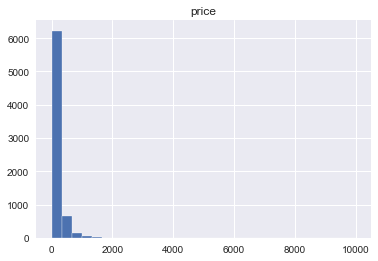

In [34]:
#price looks skewed
df.hist(column=['price'], bins=30)

In [35]:
#dropping price outliers
df = df[df['price']<=1000]

In [36]:
df['minimum_nights'].describe()

count    7021.000000
mean       15.198975
std        18.650294
min         1.000000
25%         2.000000
50%         4.000000
75%        30.000000
max       365.000000
Name: minimum_nights, dtype: float64

In [37]:
#Dropping min nights outliers
df['minimum_nights'].quantile(.99)

59.80000000000018

In [38]:
df = df[df['minimum_nights']<=59]

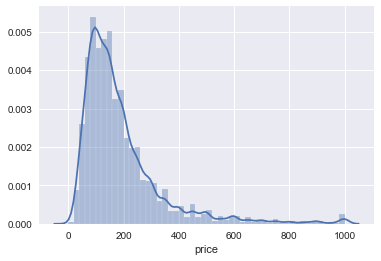

In [39]:
sns.distplot(df.price)


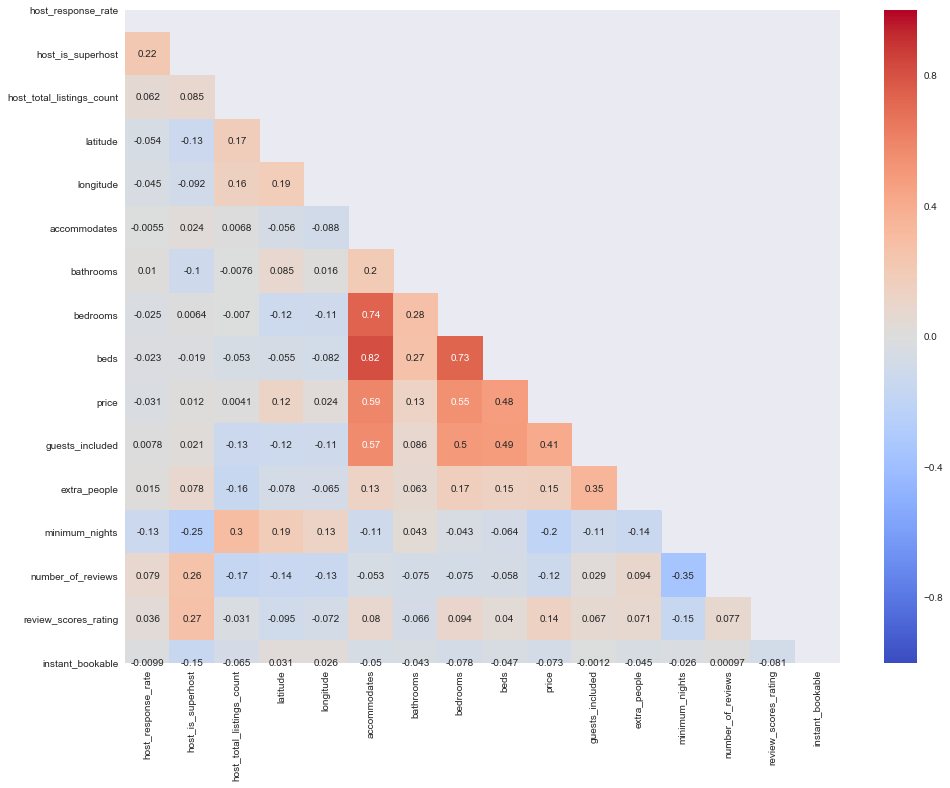

In [40]:
f, ax = plt.subplots(figsize=(16, 12))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)



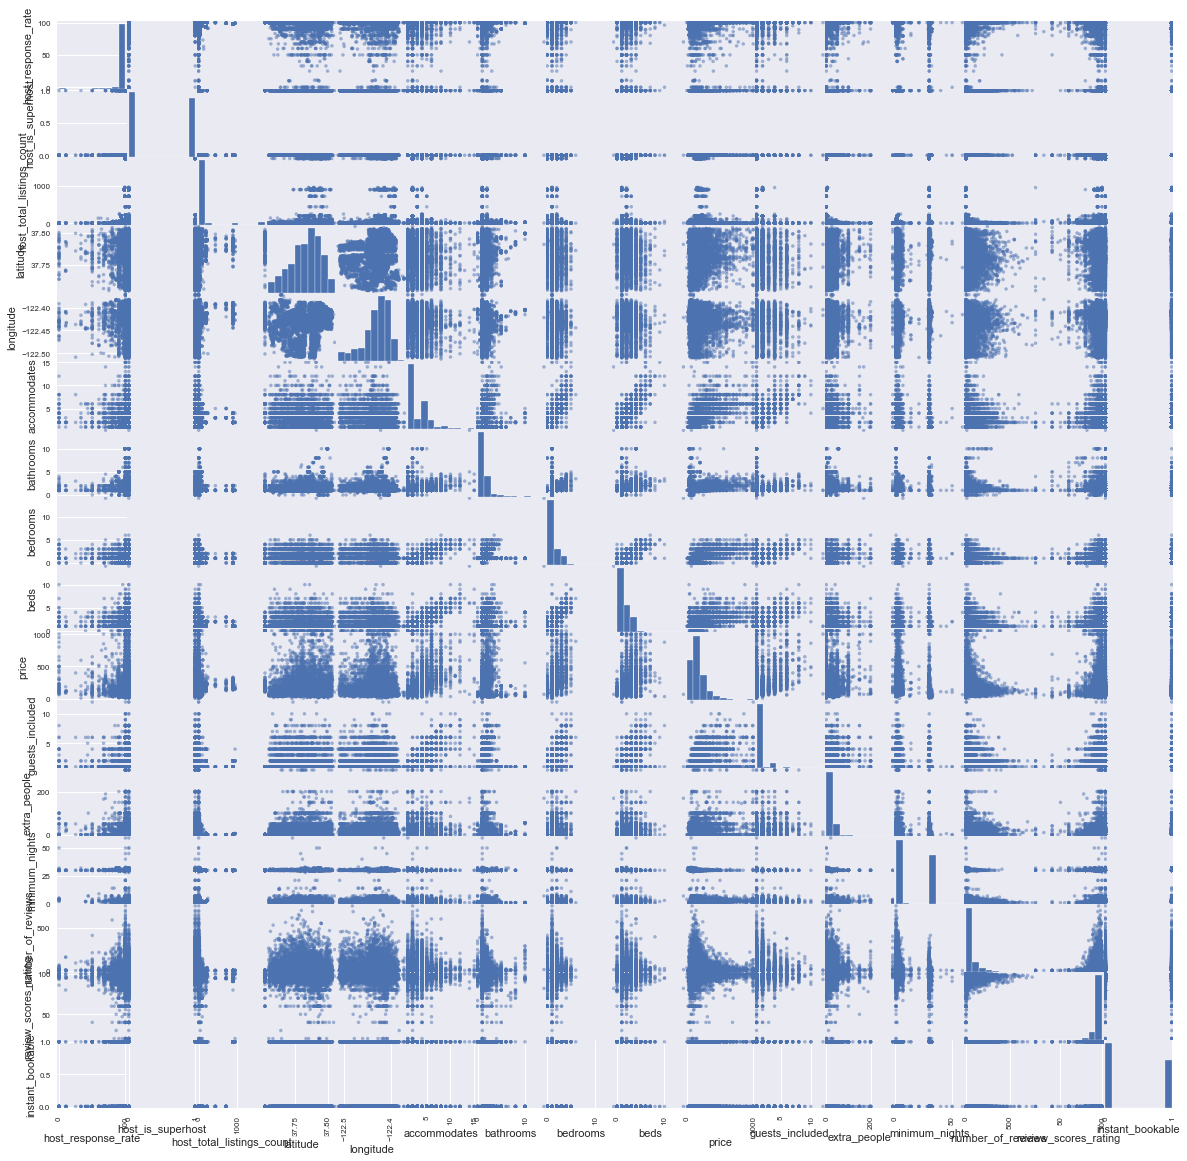

In [41]:
#looking at scatter plots of the dta
pd.plotting.scatter_matrix(df,figsize  = [20, 20]);
plt.show()

In [42]:
df.to_csv('listingscleanFINAL2.csv')

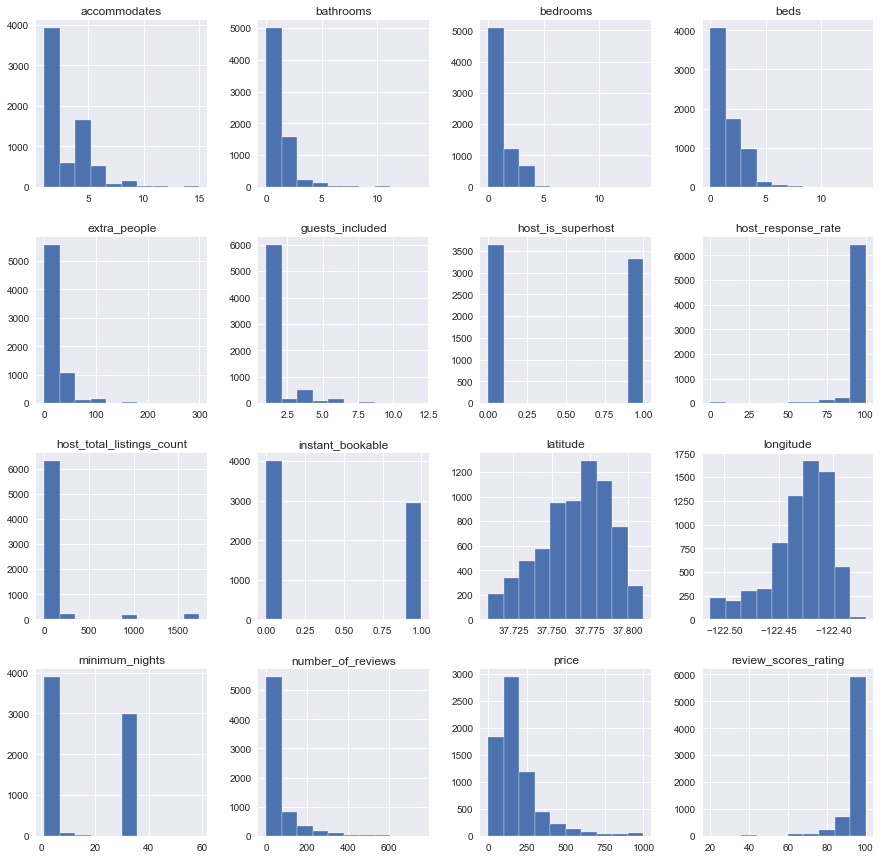

In [43]:
#histograms of the data
df.hist(figsize  = [15, 15]); 

In [44]:
df['neighbourhood_cleansed'].value_counts()

Mission                  639
Downtown/Civic Center    615
South of Market          589
Western Addition         520
Haight Ashbury           360
Castro/Upper Market      357
Bernal Heights           319
Noe Valley               284
Nob Hill                 283
Outer Sunset             265
Potrero Hill             218
Inner Richmond           188
Bayview                  176
Outer Mission            161
Marina                   160
Excelsior                160
Outer Richmond           154
Financial District       151
North Beach              142
Inner Sunset             141
Russian Hill             140
Pacific Heights          127
West of Twin Peaks       119
Parkside                 117
Chinatown                116
Ocean View               100
Visitacion Valley         78
Lakeshore                 62
Twin Peaks                61
Glen Park                 59
Crocker Amazon            34
Presidio Heights          18
Seacliff                  17
Diamond Heights           15
Golden Gate Pa

In [45]:
df['property_type'].value_counts()

Apartment             2819
House                 1982
Condominium            676
Guest suite            542
Boutique hotel         228
Hotel                  128
Townhouse              123
Serviced apartment     110
Hostel                  78
Loft                    64
Bed and breakfast       43
Aparthotel              40
Guesthouse              38
Other                   21
Resort                  12
Bungalow                11
Cottage                 11
Villa                    9
Castle                   4
Cabin                    3
Tiny house               2
Earth house              2
Hut                      1
Dome house               1
In-law                   1
Camper/RV                1
Name: property_type, dtype: int64

In [46]:
df2 = df[(df['property_type'] == 'Apartment') | (df['property_type'] == 'House') | (df['property_type'] == 'Condominium') |(df['property_type'] == 'Guest suite')]
df2.drop(df2[(df2.room_type=='Shared room')].index,inplace = True) 

In [47]:
df2['property_type'].value_counts()

Apartment      2748
House          1895
Condominium     675
Guest suite     542
Name: property_type, dtype: int64

In [48]:
df2['room_type'].value_counts()

Entire home/apt    3741
Private room       2119
Name: room_type, dtype: int64

## Binning Neighborhoods

In [49]:
nbrhd_dict = {'Bernal Heights':1330,
              'Bayview':715,
       'Castro/Upper Market':1480,
       'Chinatown':1375, 
       'Crocker Amazon':750,
       'Diamond Heights':718,
       'Downtown/Civic Center':715,
       'Excelsior':834,
       'Financial District':1050, 
       'Glen Park':1127,
       'Golden Gate Park':1300, 
       'Haight Ashbury':1500,
       'Inner Richmond':1300, 
       'Inner Sunset':1400, 
       'Lakeshore':1100,
       'Marina':1700, 
       'Mission': 1290, 
       'Nob Hill':1300, 
       'Noe Valley':1525,
       'North Beach':1375, 
       'Ocean View':700,
       'Outer Mission':1100,
       'Outer Richmond':1025, 
       'Outer Sunset':1000, 
       'Pacific Heights':1660,
       'Parkside':875, 
       'Potrero Hill':1310, 
       'Presidio':1930,
       'Presidio Heights':1930, 
       'Russian Hill':1604,
       'Seacliff':1710,
       'South of Market':1010, 
       'Twin Peaks':1212, 
       'Visitacion Valley':700,
       'West of Twin Peaks':950,
       'Western Addition':1100}

df2['neighbourhood_cleansed']=df2['neighbourhood_cleansed'].astype(str)


In [50]:

for i in range(len(df2['neighbourhood_cleansed'])):
    for k in nbrhd_dict.keys():
        if df2['neighbourhood_cleansed'].iloc[i] == k:
            df2['neighbourhood_cleansed'].iloc[i] = nbrhd_dict[k]
         
         
            
            
        
    
    


In [51]:
df2['neighbourhood_cleansed'].value_counts()

1100    636
1290    589
715     474
1010    471
1300    417
1480    334
1330    305
1500    295
1525    263
1000    253
1310    196
700     168
834     158
1375    153
1025    146
1700    137
1400    135
950     117
1660    115
1604    115
875     108
1050     80
1212     60
1127     55
750      34
1930     18
1710     15
718      13
Name: neighbourhood_cleansed, dtype: int64

In [52]:
dummies_prop = pd.get_dummies(df2['property_type'], drop_first=True)
dummies_room= pd.get_dummies(df2['room_type'], drop_first=True)


In [53]:
dummies_prop

,Condominium,Guest suite,House
0,0,0,0
1,0,0,1
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
7108,1,0,0
7109,0,0,0
7110,0,0,0
7111,1,0,0


In [54]:
dummies_room

,Private room
0,0
1,1
2,0
3,1
4,1
...,...
7108,0
7109,0
7110,0
7111,0


In [55]:
df3 = pd.concat([df2, dummies_room, dummies_prop],axis=1)

In [56]:
df3.shape

(5860, 23)

In [57]:
df3.drop(['property_type','room_type'],axis = 1,inplace = True)

In [58]:
df3.shape

(5860, 21)